<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Общая-информация-о-данных" data-toc-modified-id="Общая-информация-о-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Общая информация о данных</a></span></li><li><span><a href="#Ресемплирование-данных" data-toc-modified-id="Ресемплирование-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ресемплирование данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Скользящее-среднее-и-скользящее-стандартное-отклонение" data-toc-modified-id="Скользящее-среднее-и-скользящее-стандартное-отклонение-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Скользящее среднее и скользящее стандартное отклонение</a></span></li><li><span><a href="#Тренд-и-сезонность" data-toc-modified-id="Тренд-и-сезонность-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Тренд и сезонность</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Создание-признаков" data-toc-modified-id="Создание-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Создание признаков</a></span></li><li><span><a href="#Подготовка-выборок" data-toc-modified-id="Подготовка-выборок-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подготовка выборок</a></span></li><li><span><a href="#Функция-для-оценки-моделей-и-подбора-гиперпараметров" data-toc-modified-id="Функция-для-оценки-моделей-и-подбора-гиперпараметров-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Функция для оценки моделей и подбора гиперпараметров</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Сравнение-результатов" data-toc-modified-id="Сравнение-результатов-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Сравнение результатов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение количества заказов такси 

**Описание проекта**

Сервис по заказу такси собрал исторические данные о заказах такси в аэропортах. Необходимо построить модель для предсказания количества заказов такси на следующий час, чтобы привлекать больше водителей в период пиковой нагрузки. 

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48. Размер тестовой выборки установить 10% от исходных данных

**План выполнения проекта**

1. Загрузка данных и их ресемплирование по одному часу
2. Анализ данных
3. Обучение нескольких моделей с различными гиперпараметрами
4. Проверка данных на тестовой выборке
5. Вывод


## Подготовка данных
### Общая информация о данных

Загрузим необходимые библиотеки:

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression

import time

Загрузим данные:

In [2]:
# при загрузке изменим тип данных в столбце с датами на datetime64,
# устанавливать его в качестве индекса на данном этапе не будем, чтобы проверить данные на явные дубликаты

try:
    data = pd.read_csv('/datasets/taxi.csv', parse_dates=[0]) 
except:
    data = pd.read_csv('/Users/Dasha/time_series_project_taxi/taxi.csv', parse_dates=[0])

Изучим информацию о данных:

In [3]:
#выводим первые 5 строк таблицы
display(data.head())
    
#выводим информацию о датасете
display(data.info())
    
#выводим описательную статистику данных
display(data.describe())
    
#проверяем наличие явных дубликатов в объектах
print('Количество дубликатов в объектах:', data.duplicated().sum())

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB


None

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


Количество дубликатов в объектах: 0


Проблем в данных не обнаружено - пропуски и явные дубликаты отсутствуют, типы данных в порядке.

###  Ресемплирование данных

Отсортируем данные, чтобы они точно были расположены в хронологическом порядке:

In [4]:
# установим индекс таблицы равным столбцу datetime
data.set_index('datetime', inplace=True)

#отсортируем индексы
data = data.sort_index()

#проверим хронологию
print(data.index.is_monotonic)
print(data.info())

True
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB
None


Мы видим, что в нашем распоряжении данные с 1 марта по 31 августа 2018 года с 10-ти минутным интервалом. Выполним ресемплирование (изменение интервала) данных по 1 часу:

In [5]:
data = data.resample('1H').sum()
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


### Вывод

- Пропуски и явные дубликаты в данных отсутствуют
- Мы провели ресемплирование данных по 1 часу, изначальный интервал составлял 10 минут

## Анализ данных

### Скользящее среднее и скользящее стандартное отклонение

Построим график скользящего среднего и скользящего стандартного отклонения. Так у нас внутридневные зависимости, размер окна установим 24 (количество часов в сутках)

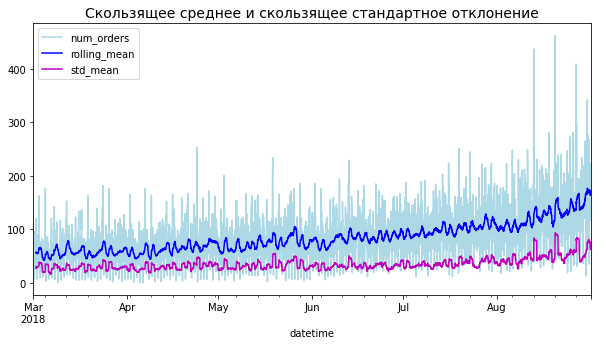

In [6]:
data['rolling_mean'] = data['num_orders'].rolling(24).mean() # скользящее среднее
data['std_mean'] = data['num_orders'].rolling(24).std() # скользящее стандартное отклонение 

data.plot(figsize=(10, 5), color=['lightblue','b', 'm'])
plt.title('Скользящее среднее и скользящее стандартное отклонение', fontsize=(14))
plt.show()

Мы видим, что скользящее среднее возрастает - такси заказывают все чаще.  Скользящее стандартное отклонение также меняется - в августе оно явно сильнее, чем в другие месяцы.

### Тренд и сезонность

Проанализируем тренд и сезонную компоненту временного ряда:

Предварительно необходимо удалить из данных столбцы со скользящим средним и скользящим стандартным отклонением:

In [7]:
data.drop(['rolling_mean', 'std_mean'], axis=1, inplace=True)

**Тренд**

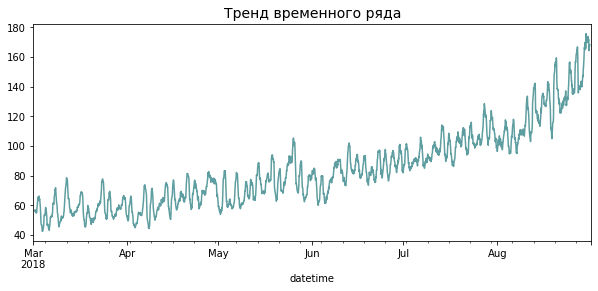

In [8]:
decomposed = seasonal_decompose(data) # раскладываем временной ряд на тренд, сезонность и остаток

decomposed.trend.plot(figsize=(10, 4), color='cadetblue')
plt.title('Тренд временного ряда', fontsize=(14))
plt.show()

График с трендом, аналогично скользящему среднему, демонстрирует ежемесячное увеличение числа заказов такси. Особенно быстрый рост в августе.

**Сезонность**

Построим график с сезонной составляющей. Так как нам необходим прогноз на ближайший час, рассмотрим недельный период - так мы поймем, есть ли закономерности, повторяющиеся каждый день.

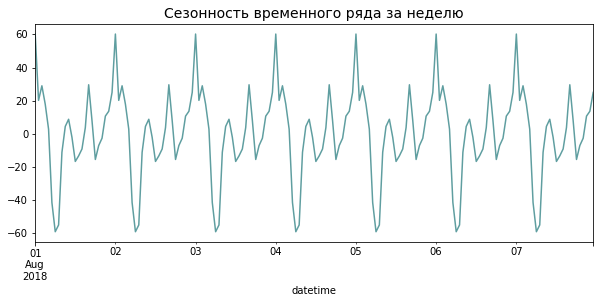

In [9]:
decomposed.seasonal['2018-08-01 00:00:00':'2018-08-07 23:50:00'].plot(figsize=(10, 4),
                                                                      color='cadetblue')
plt.title('Сезонность временного ряда за неделю', fontsize=(14))
plt.show()

Сезонность прослеживается - ежедневно пик заказа такси приходится на ночное время, а ранним утром такси практически не заказывают. Чтобы лучше понять интервалы сезонности, построим график за 1 сутки:

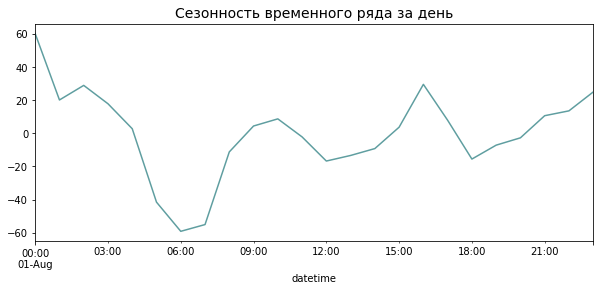

In [10]:
decomposed.seasonal['2018-08-01 00:00:00':'2018-08-01 23:50:00'].plot(figsize=(10, 4),
                                                                      color='cadetblue')
plt.title('Сезонность временного ряда за день', fontsize=(14))
plt.show()

Проверим стационарность временного ряда, применив тест Дики - Фуллера:

In [11]:
# код ревьювера
from statsmodels.tsa.stattools import adfuller

ts = data['num_orders']
st_test = adfuller(ts, regression='ctt')


if st_test[1] < 0.05:
    print('Наш ряд стационарный')
else:
    print('Ряд нестационарный')

Наш ряд стационарный


### Вывод
- Временной ряд стационарный, что хороша для прогнозирования
- Скользящее среднее числа заказов растет, скользящее стандартное отклонение в августе сильнее, чем в другие месяцы
- Виден тренд на ежемесячное увеличение числа заказов такси
- Прослеживается сезонность - самый пик заказов приходится на полночь, также количество заказов такси возрастает в районе 2 ночи, 10 утра и 16 часов дня. В районе 6 утра сильный спад числа заказов такси

## Обучение моделей

### Создание признаков

Создадим функцию функцию *make_features()* , чтобы прибавить к данным новые признаки:

- Календарные признаки: день недели и час, исходя из объема данных (март - август 2018 г) и горизонта прогнозирования (1 час)

- Отстающие значения, чтобы понять, будет ли функция *x(t)* расти или уменьшаться

- Скользящее среднее, не включающее в себя текущее значение ряда, чтобы не допустить утечку целевого признака в признак

In [12]:
# функция для создания новых признаков
def make_features(data, max_lag, rolling_mean_size):
    # добавляем календарные признаки
    data['dayofweek'] = data.index.dayofweek # признак 'день недели'
    data['hour'] = data.index.hour # признак 'час'
    
    # добавляем отстающие значения (1 час и 1 сутки)
    for lag in range(1, max_lag + 25, 24):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
        
    # добавляем скользящее среднее без текущего значения ряда
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

# так как в данных присутствует внутридневная зависимость, применим функцию к нашим данным,
# передав значение аргументов 'rolling_mean_size'= 24
# 'max_lag'= 2' для создания отстающих значений на час и на сутки
make_features(data, 2, 24)

data.head(50)

,num_orders,dayofweek,hour,lag_1,lag_25,rolling_mean
datetime,,,,,,
2018-03-01 00:00:00,124,3,0,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,124.0,NaN,NaN
2018-03-01 02:00:00,71,3,2,85.0,NaN,NaN
2018-03-01 03:00:00,66,3,3,71.0,NaN,NaN
2018-03-01 04:00:00,43,3,4,66.0,NaN,NaN
2018-03-01 05:00:00,6,3,5,43.0,NaN,NaN
2018-03-01 06:00:00,12,3,6,6.0,NaN,NaN
2018-03-01 07:00:00,15,3,7,12.0,NaN,NaN
2018-03-01 08:00:00,34,3,8,15.0,NaN,NaN


### Подготовка выборок

Разобьем данные на обучающую (90%) и тестовую (10%) выборки. Так как объекты временного ряда нельзя перемешивать, укажем гиперпараметр `shuffle=False`:

In [13]:
# разбивка данных на обучающущю и тестовую выборки
train, test = train_test_split(data, shuffle=False, test_size=0.1) 

# заполним пропуски в обучающей выборке
train = train.dropna()

# проверка корректности разбивки
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

2018-03-02 01:00:00 2018-08-13 13:00:00
2018-08-13 14:00:00 2018-08-31 23:00:00


Разбивка проведена корректно.

Сохраним признаки в переменную `features`, целевой признак - в переменную `target`:

In [14]:
features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']

features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

### Функция для оценки моделей и подбора гиперпараметров

Чтобы избежать проблемы подглядывания при работе с временным рядом, проверять качество моделей будем с помощью кросс-валидации на скользящей основе:

- подготовим блоки для кросс-валидации с помощью *TimeSeriesSplit()*
- проведем оценку качества моделей и подбор гиперпараметров с помощью *GridSearchCV()*

Рассчитаем количество блоков для кросс-валидации так, чтобы один блок был примерно равен тестовой выборке:

In [15]:
N_SPLITS = round(len(train) / len(test))
N_SPLITS 

9

Создадим функцию `best_model` для оценки качества моделей и подборки гиперпараметров кросс-валидацией:

In [16]:
# функция для оценки качества моделей и подборки гиперпараметров кросс-валидацией:
def best_model(model, parameters, features_train, target_train):
    
    # подготовка блоков для кросс-валидации
    tscv = TimeSeriesSplit(n_splits=N_SPLITS)
    
    # подбор гиперпараметров и расчет RMSE с помощью GridSearchCV
    grid = GridSearchCV(model, parameters, cv=tscv, scoring='neg_root_mean_squared_error', n_jobs=-1)
    grid.fit(features_train, target_train)
    
    #сохраним лучшую модель
    model_best = grid.best_estimator_
    print('Лучший результат RMSE:', abs(round(grid.best_score_)))
    print('')
    print('Модель и гиперпараметры:', model_best)

### Случайный лес

In [17]:
#Объявляем константную переменную со значением рандомайзера
RANDOM_STATE=12345

In [18]:
# создаем модель Случайный лес
model_rfr = RandomForestRegressor()

# создаем словарь с гиперпараметрами для перебора
parameters_rfr = {
    'n_estimators': range(2, 33, 5),
    'max_depth': range(1, 10, 2),
    'n_jobs': [-1],
    'random_state': [RANDOM_STATE]
}

# подбор гиперпараметров и расчет RMSE
best_model(model_rfr, parameters_rfr, features_train, target_train)

Лучший результат RMSE: 25

Модель и гиперпараметры: RandomForestRegressor(max_depth=9, n_estimators=32, n_jobs=-1,
                      random_state=12345)


### LightGBM

In [19]:
%%time
# создаем модель LightGBM
model_lgbm = LGBMRegressor()
 
# создаем словарь с гиперпараметрами для перебора
parameters_lgbm = {
    'num_leaves': [10, 20, 31], 
    'n_estimators': [10, 50, 100],
    'max_depth' : [10, 15],
    'verbose': [-1],
    'n_jobs': [-1],
    'random_state': [RANDOM_STATE]
}

# подбор гиперпараметров и расчет RMSE
best_model(model_lgbm, parameters_lgbm, features_train, target_train)

Лучший результат RMSE: 24

Модель и гиперпараметры: LGBMRegressor(max_depth=15, n_estimators=50, random_state=12345, verbose=-1)
CPU times: user 39 s, sys: 263 ms, total: 39.3 s
Wall time: 39.6 s


### Линейная регрессия

In [20]:
# создаем модель Линейная регрессия
model_lr = LinearRegression()

parameters_lr = {'n_jobs': [-1]}
    
# подбор гиперпараметров и расчет RMSE
best_model(model_lr, parameters_lr, features_train, target_train)

Лучший результат RMSE: 31

Модель и гиперпараметры: LinearRegression(n_jobs=-1)


### Сравнение результатов

Оформим значения метрики *RMSE* для всех моделей в сводную таблицу. Так как *RMSE* это корень средней квадратичной ошибки, чем меньше ее знаение, тем качественнее предсказание модели.

In [21]:
score_data = pd.DataFrame(
   
    data=[
        25,
        24,
        31
    ],
    
    index=[
        'Случайный лес', 
        'LightGBM',
        'Линейная регрессия'
    ],
    
    columns=['RMSE']
)
score_data.sort_values('RMSE')

,RMSE
LightGBM,24
Случайный лес,25
Линейная регрессия,31


### Вывод

- Мы прибавили к данным новые признаки: 
  - календарные признаки (неделя, день, час)
  - отстающие значения
  - скользящее среднее без текущее значение ряда

- Мы оценивали качество предсказания и подбирали гиперпараметры, используя кросс-валидацию на скользящей основе: 
  - ***лучшее качество предсказания показала модель LGBMRegressor(max_depth=15, n_estimators=50, random_state=12345, verbose=-1): RMSE = 24***
  - у модели *RandomForestRegressor(max_depth=9, n_estimators=32, n_jobs=-1, random_state=12345)* результат чуть ниже: *RMSE* = 25
  - самое низкое качество предсказания у *LinearRegression()*: *RMSE* = 31

## Тестирование модели

Проведем проверку выбранной нами модели *LGBMRegressor(max_depth=15, n_estimators=50, random_state=12345, verbose=-1)* на тестовой выборке:

In [22]:
# создаем модель LightGBM с подобранными гиперпараметрами
model_lgbm_best = LGBMRegressor(
    max_depth=15, 
    n_estimators=50,  
    random_state=12345, 
    verbose=-1)
 
# обучаем модель на тренировочной выборке
model_lgbm_best.fit(features_train, target_train)

# получаем предсказания на тестовой выборке
predictions = model_lgbm_best.predict(features_test)

#расчет RMSE
print('RMSE для модели LightGBM на тестовой выборке:', 
      round(mean_squared_error(target_test, predictions, squared=False)))

RMSE для модели LightGBM на тестовой выборке: 43


### Вывод
Модель *LGBMRegressor(max_depth=15, n_estimators=50, random_state=12345, verbose=-1)* успешно прошла проверку на тестовой выборке с результатом *RMSE* = 43. По условию задачи *RMSE* на тестовой выборке должно быть не больше 48.

## Общий вывод

**Результат подготовки данных**

При подготовке данных было выполнено ресемплирование по 1 часу

**Результат анализа данных**

С помощью анализа построенных графиков мы выяснили, что скользящее среднее числа заказов растет, скользящее стандартное отклонение в августе сильнее, чем в другие месяцы. Отчетливо виден тренд на ежемесячное увеличение числа заказов такси. Прослеживается сезонность - самый пик заказов приходится на полночь, в районе 6 утра сильный спад заказов. Результат теста Дики - Фуллера показал, что временной ряд стационарный

**Результат обучения моделей**

В ходе обучения мы проверяли качество предсказания моделей и подбирали гиперпараметрами с помощью кросс-валидации на скользящей основе, используя *TimeSeriesSplit()* и *GridSearchCV*. Лучший результат показала модель  *LGBMRegressor(max_depth=15, n_estimators=50, random_state=12345, verbose=-1)*: *RMSE* = 24

**Результат тестирования модели**

Тест прошел успешно. Модель *LGBMRegressor(max_depth=15, n_estimators=50, random_state=12345, verbose=-1)* на тестовой выборке показала значение *RMSE* = 43, преодолев бейзлайн из условия задания, равный 48.